**Data Introduction**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/DL_Project/')

In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

In [6]:
import os,cv2
directory='/content/drive/MyDrive/DL_Project/CKPlus_250/'
dir_list=os.listdir(directory)
image_data_list=[]
labels=[]
emotions=[]
l=0
for data_dir in dir_list:
    data_list=os.listdir(directory+'/'+data_dir)
    for img in data_list:
        input_img=cv2.imread(directory+'/'+data_dir+'/'+img)
        input_img=cv2.resize(input_img,(64,64))
        image_data_list.append(input_img)
        labels.append(l)
    emotions.append(data_dir)
    l=l+1
img_data=np.array(image_data_list)
img_data=img_data/255
img_data.shape

(250, 64, 64, 3)

Distribution of classes

In [7]:
for i in range(7):
    print('No of instances with class value '+ str(i) + ' : ' + str(labels.count(i)))

No of instances with class value 0 : 45
No of instances with class value 1 : 18
No of instances with class value 2 : 25
No of instances with class value 3 : 45
No of instances with class value 4 : 28
No of instances with class value 5 : 45
No of instances with class value 6 : 44


Train-Validation-Test Split (80-10-10)

In [9]:
num_classes=7
Y = keras.utils.to_categorical(labels, num_classes)
X_train, X_t, y_train, y_t = train_test_split(img_data, Y, test_size=0.2,shuffle= True, random_state=20) 
X_val,X_test,y_val,y_test = train_test_split(X_t,y_t,test_size=0.5,shuffle= False)

Visualising the dataset

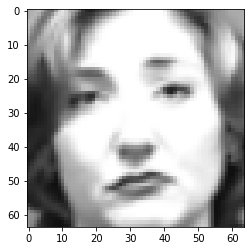

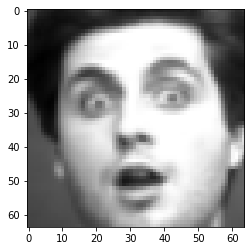

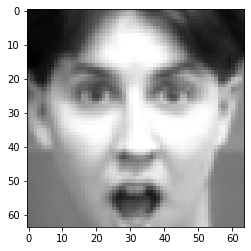

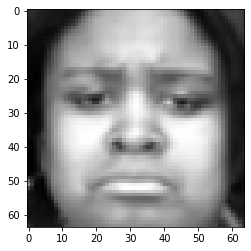

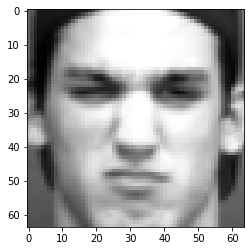

In [10]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(X_train[i])
    plt.show()

In [ ]:
####

In [11]:
import os
import cv2

data_path = '/content/drive/MyDrive/DL_Project/CKPlus_250/'
data_dir_list = os.listdir(data_path)

img_data_list=[]

numbers = []
c=0

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        input_img_resize = np.reshape(input_img_resize,(48,48,1))
        img_data_list.append(input_img_resize)
        c += 1
    numbers.append(c)
    c = 0
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-happy

Loaded the images of dataset-contempt

Loaded the images of dataset-fear

Loaded the images of dataset-surprise

Loaded the images of dataset-sadness

Loaded the images of dataset-anger

Loaded the images of dataset-disgust



(250, 48, 48, 1)

In [12]:
pl = img_data
np.reshape(pl[0],(48,48,1))
pl[0].shape

(48, 48, 1)

In [15]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #135
labels[135:188]=6 #54
labels[189:365]=1 #177
labels[366:440]=2 #75
labels[441:647]=3 #207
labels[648:731]=4 #84
labels[732:980]=5 #249

names = ['Angry','disgust','Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def getLabel(id):
    return ['Angry','disgust','Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][id]

NameError: ignored

In [21]:
#######

In [29]:
INPUT_PATH = '/content/drive/MyDrive/DL_Project/CKPlus_250/'
INPUT_PATH

'/content/drive/MyDrive/DL_Project/CKPlus_250/'

In [30]:
total_images = 0
for dir_ in os.listdir(INPUT_PATH):
    count = 0
    for f in os.listdir(INPUT_PATH + dir_ + "/"):
        count += 1
        total_images += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal images are {total_images}")

happy has 45 number of images
contempt has 18 number of images
fear has 25 number of images
surprise has 45 number of images
sadness has 28 number of images
anger has 45 number of images
disgust has 44 number of images

total images are 250


In [31]:
TOP_EMOTIONS = ["anger","disgust","fear", "happy", "contempt", "sadness","surprise"]

In [32]:
img_arr = np.empty(shape=(total_images,48,48,3))
img_label = np.empty(shape=(total_images))
label_to_text = {}

i = 0
e = 0
for dir_ in os.listdir(INPUT_PATH):
    if dir_ in TOP_EMOTIONS:
        label_to_text[e] = dir_
        for f in os.listdir(INPUT_PATH + "/" + dir_ + "/"):
            img_arr[i] = cv2.imread(INPUT_PATH + "/"+ dir_ + "/" + f)
            img_label[i] = e
            i += 1
        print(f"loaded all {dir_} images to numpy arrays")
        e += 1

img_arr.shape, img_label

loaded all happy images to numpy arrays
loaded all contempt images to numpy arrays
loaded all fear images to numpy arrays
loaded all surprise images to numpy arrays
loaded all sadness images to numpy arrays
loaded all anger images to numpy arrays
loaded all disgust images to numpy arrays


((250, 48, 48, 3),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6

In [33]:
label_to_text

{0: 'happy',
 1: 'contempt',
 2: 'fear',
 3: 'surprise',
 4: 'sadness',
 5: 'anger',
 6: 'disgust'}

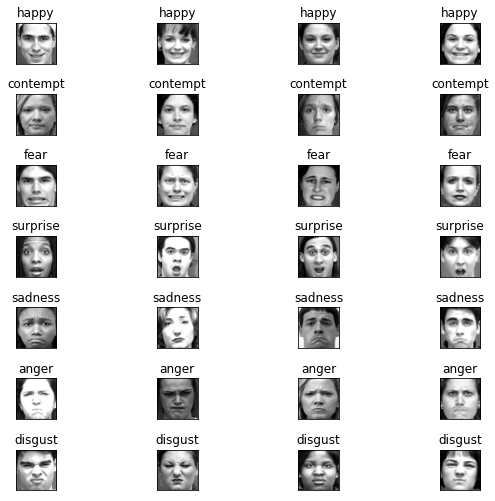

In [44]:
fig = plt.figure(1, (8,8))

idx = 0
for k in label_to_text:
    sample_indices = np.random.choice(np.where(img_label==k)[0], size=4, replace=False)
    sample_images = img_arr[sample_indices]
    for img in sample_images:
        idx += 1
        ax = plt.subplot(8,4,idx)
        ax.imshow(img[:,:,0], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[k])
        plt.tight_layout()

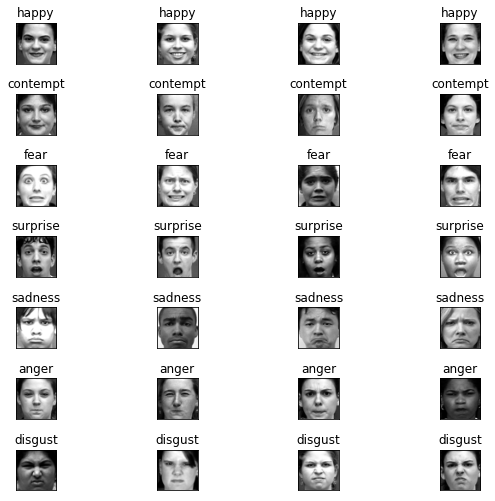

In [43]:
fig = plt.figure(1, (8,8))

idx = 0
for k in label_to_text:
    sample_indices = np.random.choice(np.where(img_label==k)[0], size=4, replace=False)
    sample_images = img_arr[sample_indices]
    for img in sample_images:
        idx += 1
        ax = plt.subplot(8,4,idx)
        ax.imshow(img[:,:,0], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[k])
        plt.tight_layout()